In [1]:
import os
import cv2
import numpy as np

In [2]:
def list_files_in_directory(directory):
    """List all files in a given directory."""
    files = os.listdir(directory)
    files = [directory + file for file in files if(os.path.isfile(os.path.join(directory, file)))]
    return sorted(files)
            

In [136]:
sim_world_avatar = list_files_in_directory('sim_frames_enlight/')
sim_world_noavatar = list_files_in_directory('sim_frames_enlight_world7/')
world_mask = cv2.imread('enlightenment_world_mask.png').astype(np.float32)/255.0
world_in_head = cv2.imread('enlightenment_orig.png').astype(np.float32)/255.0

In [4]:
# cv2.imshow('Combined Image', cv2.imread(sim_world_avatar[100]))
cv2.imshow('Combined Image', world_mask)
cv2.waitKey(0)

102

In [5]:
img_sim_world_avatar = cv2.imread(sim_world_avatar[-1]).astype(np.float32)/255.0
img_sim_world_noavatar = cv2.imread(sim_world_noavatar[-1]).astype(np.float32)/255.0

print(img_sim_world_avatar.shape)
print(img_sim_world_noavatar.shape)
print(world_mask.shape)

(1180, 1180, 3)
(1180, 1180, 3)
(1388, 1388, 3)


In [56]:
# Center the mask in the image
# The width of the image
ew = 91
newshape = (img_sim_world_avatar.shape[0] - 2*ew, img_sim_world_avatar.shape[1] - 2*ew)


world_mask_rs = np.zeros_like(img_sim_world_avatar)
world_mask_rs[ew:-ew, ew:-ew, :] = cv2.resize(world_mask, newshape)

# Same with the original world
world_in_head_rs = np.ones_like(img_sim_world_avatar)
world_in_head_rs[ew:-ew, ew:-ew, :] = cv2.resize(world_in_head, newshape)

In [ ]:
cv2.imshow('Combined Image', img_sim_world_noavatar)
cv2.waitKey(0)

In [ ]:
# Fade between world sims and the world mask
alpha = 0.5
comb = alpha * img_sim_world_avatar + (1-alpha) * img_sim_world_noavatar
cv2.imshow('Combined Image', comb)
cv2.waitKey(0)

In [ ]:
beta = 0.8
masked_comb = (beta*world_mask_rs)*comb + world_mask_rs*(1-beta)*world_in_head_rs + (1 - world_mask_rs)*world_in_head_rs
cv2.imshow('Combined Image', masked_comb)
cv2.waitKey(0)

In [133]:
beta = 0.8
ranger = 1800
smooth = 2
skipper = 10

alpha_min = 0.4
alpha_max = 1.0

smooth_list_avatar = []
smooth_list_noavatar = []
# Iterate through all files and combine them
for i in range(len(sim_world_avatar)):
    if(i%skipper != 0):
        continue
    alpha = 1 - float(i)/ranger
    alpha = (alpha_max-alpha_min)*logistic_function(alpha, k=40) + alpha_min
    
    img_sim_world_avatar = cv2.imread(sim_world_avatar[i]).astype(np.float32)/255.0
    img_sim_world_noavatar = cv2.imread(sim_world_noavatar[i]).astype(np.float32)/255.0
    
    # Smooth the images
    smooth_list_avatar += [img_sim_world_avatar]
    smooth_list_noavatar += [img_sim_world_noavatar]
    if(len(smooth_list_avatar) > smooth):
        smooth_list_avatar.pop(0)
    if(len(smooth_list_noavatar) > smooth):
        smooth_list_noavatar.pop(0)
    
    img_sim_world_avatar = sum(smooth_list_avatar)/len(smooth_list_avatar)
    img_sim_world_noavatar = sum(smooth_list_noavatar)/len(smooth_list_noavatar)
    
    comb = alpha * img_sim_world_avatar + (1-alpha) * img_sim_world_noavatar
    masked_comb = (beta*world_mask_rs)*comb + world_mask_rs*(1-beta)*world_in_head_rs + (1 - world_mask_rs)*world_in_head_rs
#     comb_norm = cv2.cvtColor(comb, cv2.COLOR_BGR2GRAY)[...,None]
#     comb_norm = (comb_norm - np.min(comb_norm))/(np.max(comb_norm) - np.min(comb_norm)) + 0.2
#     print(comb_norm.shape, world_mask_rs.shape)
#     comb_norm = comb_norm + (1-world_mask_rs)
#     masked_comb = comb_norm*world_in_head_rs 
    masked_comb = (masked_comb*255.0).astype(np.uint8)
    cv2.imshow('Combined Image', masked_comb)
    cv2.waitKey(10)
    
    output_image_path = './sim_frames_enlight_output/frame_{0:06d}.jpg'.format(i)
    print(output_image_path)
    cv2.imwrite(output_image_path, masked_comb)
    if(i > ranger):
        break

./sim_frames_enlight_output/frame_000000.jpg
./sim_frames_enlight_output/frame_000010.jpg
./sim_frames_enlight_output/frame_000020.jpg
./sim_frames_enlight_output/frame_000030.jpg
./sim_frames_enlight_output/frame_000040.jpg
./sim_frames_enlight_output/frame_000050.jpg
./sim_frames_enlight_output/frame_000060.jpg
./sim_frames_enlight_output/frame_000070.jpg
./sim_frames_enlight_output/frame_000080.jpg
./sim_frames_enlight_output/frame_000090.jpg
./sim_frames_enlight_output/frame_000100.jpg
./sim_frames_enlight_output/frame_000110.jpg
./sim_frames_enlight_output/frame_000120.jpg
./sim_frames_enlight_output/frame_000130.jpg
./sim_frames_enlight_output/frame_000140.jpg
./sim_frames_enlight_output/frame_000150.jpg
./sim_frames_enlight_output/frame_000160.jpg
./sim_frames_enlight_output/frame_000170.jpg
./sim_frames_enlight_output/frame_000180.jpg
./sim_frames_enlight_output/frame_000190.jpg
./sim_frames_enlight_output/frame_000200.jpg
./sim_frames_enlight_output/frame_000210.jpg
./sim_fram

IndexError: list index out of range

In [165]:
def zoom_into_image(image, zoom_factor, center_x=None, center_y=None):
    """Zoom into an image by a given factor at specified center coordinates and save the result to a file."""
    # Load the image from the input path

    # Get the original dimensions
    (original_height, original_width) = image.shape[:2]

    # If no center coordinates are provided, use the image center
    if center_x is None:
        center_x = original_width // 2
    if center_y is None:
        center_y = original_height // 2

    # Calculate the size of the cropped region
    crop_width = int(original_width / zoom_factor)
    crop_height = int(original_height / zoom_factor)

    # Ensure the crop size is even to avoid fractional pixels
    crop_width -= crop_width % 2
    crop_height -= crop_height % 2

    # Calculate the coordinates of the top-left corner of the cropped region
    start_x = max(center_x - crop_width // 2, 0)
    start_y = max(center_y - crop_height // 2, 0)

    # Adjust crop size if it goes beyond image boundaries
    if start_x + crop_width > original_width:
        start_x = original_width - crop_width
    if start_y + crop_height > original_height:
        start_y = original_height - crop_height

    # Crop the region of interest
    cropped_image = image[start_y:start_y + crop_height, start_x:start_x + crop_width]

    # Resize the cropped region back to the original image dimensions
    zoomed_image = cv2.resize(cropped_image, (original_width, original_height), interpolation=cv2.INTER_LINEAR)

    # Save the zoomed image to the output path
    return zoomed_image
    
beta = 0.8
ranger = 1800
smooth = 2
skipper = 10

alpha_min = 0.4
alpha_max = 1.0
zoom_min = 1.0
zoom_max = 1.8

stop_zoom = 0.5

smooth_list_avatar = []
smooth_list_noavatar = []
# Iterate through all files and combine them
for i in range(len(sim_world_avatar)):
    if(i%skipper != 0):
        continue
    a = 1 - float(i)/ranger
    alpha = (alpha_max-alpha_min)*logistic_function(a+stop_zoom/2, k=40) + alpha_min
    if(a > stop_zoom):
        zoom = (zoom_max-zoom_min)*(1-a) + zoom_min
    
    img_sim_world_avatar = cv2.imread(sim_world_avatar[i]).astype(np.float32)/255.0
    img_sim_world_noavatar = cv2.imread(sim_world_noavatar[i]).astype(np.float32)/255.0
    
    # Smooth the images
    smooth_list_avatar += [img_sim_world_avatar]
    smooth_list_noavatar += [img_sim_world_noavatar]
    if(len(smooth_list_avatar) > smooth):
        smooth_list_avatar.pop(0)
    if(len(smooth_list_noavatar) > smooth):
        smooth_list_noavatar.pop(0)
    
    img_sim_world_avatar = sum(smooth_list_avatar)/len(smooth_list_avatar)
    img_sim_world_noavatar = sum(smooth_list_noavatar)/len(smooth_list_noavatar)
    
    comb = alpha * img_sim_world_avatar + (1-alpha) * img_sim_world_noavatar
    masked_comb = (beta*world_mask_rs)*comb + world_mask_rs*(1-beta)*world_in_head_rs + (1 - world_mask_rs)*world_in_head_rs
    masked_comb = (masked_comb*255.0).astype(np.uint8)
    masked_comb = zoom_into_image(masked_comb, zoom_factor=zoom, center_x=675, center_y=520)
    cv2.imshow('Combined Image', masked_comb)
    cv2.waitKey(10)
    
    output_image_path = './sim_frames_enlight_output_zoom/frame_{0:06d}.jpg'.format(i)
    print(output_image_path, 'zoom: ', zoom)
    cv2.imwrite(output_image_path, masked_comb)
    if(i > ranger):
        break

./sim_frames_enlight_output_zoom/frame_000000.jpg zoom:  1.0
./sim_frames_enlight_output_zoom/frame_000010.jpg zoom:  1.0044444444444445
./sim_frames_enlight_output_zoom/frame_000020.jpg zoom:  1.008888888888889
./sim_frames_enlight_output_zoom/frame_000030.jpg zoom:  1.0133333333333334
./sim_frames_enlight_output_zoom/frame_000040.jpg zoom:  1.017777777777778
./sim_frames_enlight_output_zoom/frame_000050.jpg zoom:  1.0222222222222221
./sim_frames_enlight_output_zoom/frame_000060.jpg zoom:  1.0266666666666666
./sim_frames_enlight_output_zoom/frame_000070.jpg zoom:  1.031111111111111
./sim_frames_enlight_output_zoom/frame_000080.jpg zoom:  1.0355555555555556
./sim_frames_enlight_output_zoom/frame_000090.jpg zoom:  1.04
./sim_frames_enlight_output_zoom/frame_000100.jpg zoom:  1.0444444444444445
./sim_frames_enlight_output_zoom/frame_000110.jpg zoom:  1.048888888888889
./sim_frames_enlight_output_zoom/frame_000120.jpg zoom:  1.0533333333333332
./sim_frames_enlight_output_zoom/frame_000130

./sim_frames_enlight_output_zoom/frame_001110.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001120.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001130.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001140.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001150.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001160.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001170.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001180.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001190.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001200.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001210.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001220.jpg zoom:  1.3955555555555557
./sim_frames_enlight_output_zoom/frame_001230.jpg zoom:  1.3955555555555557
./sim_frames

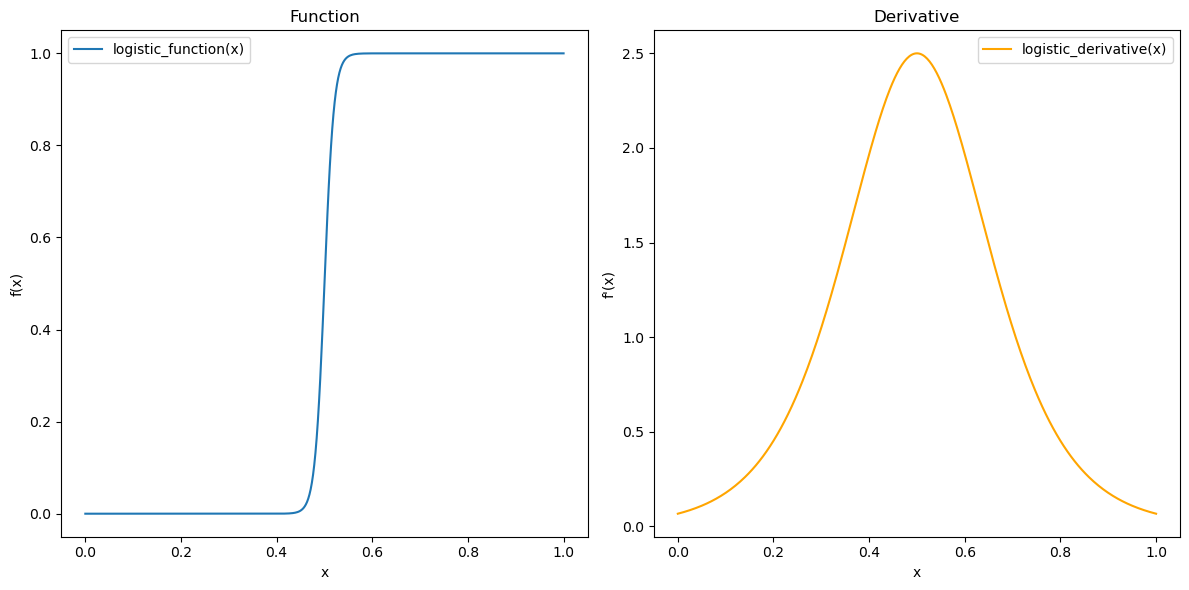

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, k=100):
    return 1 / (1 + np.exp(-k * (x - 0.5)))

def logistic_derivative(x, k=10):
    fx = logistic_function(x, k)
    return k * fx * (1 - fx)

# Generate x values from 0 to 1
x = np.linspace(0, 1, 400)
# Compute the function and its derivative values
y = logistic_function(x)
dy = logistic_derivative(x)

# Plot the function
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='logistic_function(x)')
plt.title('Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='logistic_derivative(x)', color='orange')
plt.title('Derivative')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()

plt.tight_layout()
plt.show()
